<a href="https://colab.research.google.com/github/femy3107/Solar-Radiation-Prediction/blob/main/Solar_Radiation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn

# **Solar Radiation Prediction Analysis**

The dataset contains such columns as: "wind direction", "wind speed", "humidity" and temperature. The response parameter that is to be predicted is: "Solar_radiation". It contains measurements for the past 4 months and you have to predict the level of solar radiation.
Just imagine that you've got solar energy batteries and you want to know will it be reasonable to use them in future?

About this file
These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016) between Mission IV and Mission V.

For each dataset, the fields are:

A row number (1-n) useful in sorting this export's results
The UNIX time_t date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results
The date in yyyy-mm-dd format
The local time of day in hh:mm:ss 24-hour format
The numeric data, if any (may be an empty string)
The text data, if any (may be an empty string)

The units of each dataset are:


*  Solar radiation: watts per meter^2

*   Temperature: degrees Fahrenheit
*   Humidity: percent


*   Barometric pressure: Hg

*   Wind direction: degrees

*   Wind speed: miles per hour
*   Sunrise/sunset: Hawaii time











In [ ]:
#import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read the file
Data = pd.read_csv('/content/SolarPrediction.csv')
Data.head() # it gives top 5 values

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [ ]:
Data.tail() # it gives bottom 5 values

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00
32685,1480586402,12/1/2016 12:00:00 AM,00:00:02,1.20,44,30.43,101,83.59,3.37,06:41:00,17:42:00


In [ ]:
Data.shape  # ie,no.of rows and the no. of columns

(32686, 11)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
Data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [ ]:
Data.columns # column names

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [ ]:
Data.isna().sum()    #to get null values in each columns

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

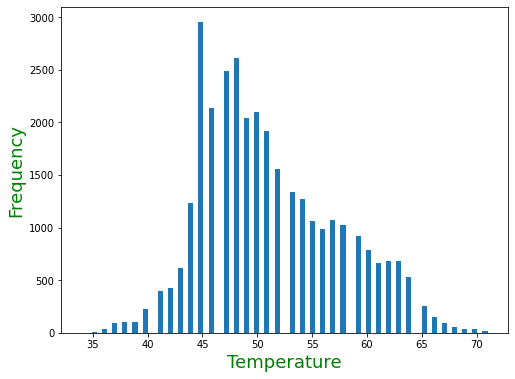

In [ ]:
Data.Temperature.plot(kind = 'hist',bins = 80,figsize = (8,6)) 
plt.xlabel("Temperature",{"fontsize":18,"color":"green"}) 
plt.ylabel("Frequency",{"fontsize":18,"color":"green"})  
plt.show()

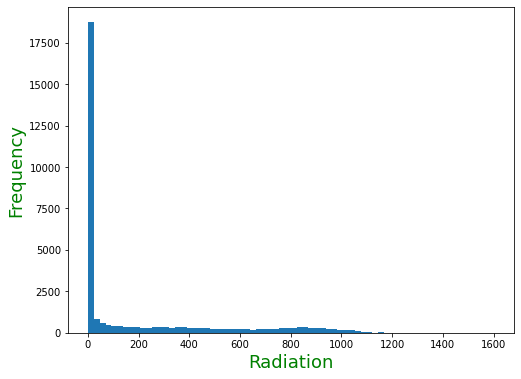

In [ ]:
Data.Radiation.plot(kind = 'hist',bins = 70,figsize = (8,6)) 
plt.xlabel("Radiation",{"fontsize":18,"color":"green"}) 
plt.ylabel("Frequency",{"fontsize":18,"color":"green"})     
plt.show()

In [ ]:
#Covert time to_datetime

#Add column 'hour'
Data['Time_conv'] =  pd.to_datetime(Data['Time'], format='%H:%M:%S')
Data['hour'] = pd.to_datetime(Data['Time_conv'], format='%H:%M:%S').dt.hour

#Add column month
Data['month'] = pd.to_datetime(Data['UNIXTime'].astype(int), unit='s').dt.month

#Add column 'year'
Data['year'] = pd.to_datetime(Data['UNIXTime'].astype(int), unit='s').dt.year

#Duration of Day
Data['total_time'] = pd.to_datetime(Data['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(Data['TimeSunRise'], format='%H:%M:%S').dt.hour
Data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Time_conv,hour,month,year,total_time
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,1900-01-01 23:55:26,23,9,2016,12
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,1900-01-01 23:50:23,23,9,2016,12
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,1900-01-01 23:45:26,23,9,2016,12
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,1900-01-01 23:40:21,23,9,2016,12
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,1900-01-01 23:35:24,23,9,2016,12


In [ ]:
Data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,hour,month,year,total_time
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,11.557425,10.489353,2016.003671,11.347886
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,6.912034,1.235468,0.060481,0.476307
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,0.000000,1.000000,2016.000000,11.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,6.000000,10.000000,2016.000000,11.000000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,12.000000,11.000000,2016.000000,11.000000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,18.000000,11.000000,2016.000000,12.000000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,23.000000,12.000000,2017.000000,12.000000


# Data Visualizations

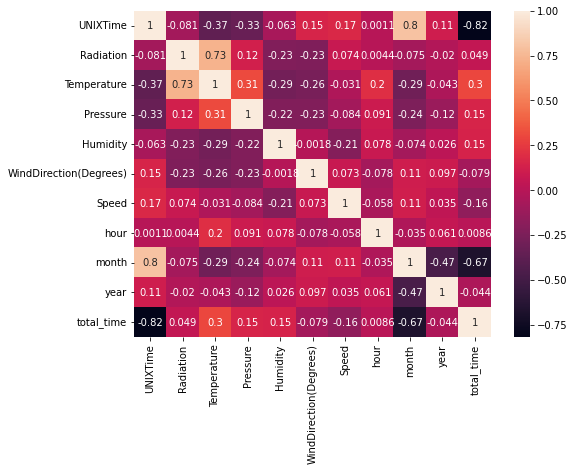

In [ ]:
figure = plt.figure(figsize=(8,6))
sns.heatmap(Data.corr(),annot=True)
plt.show()

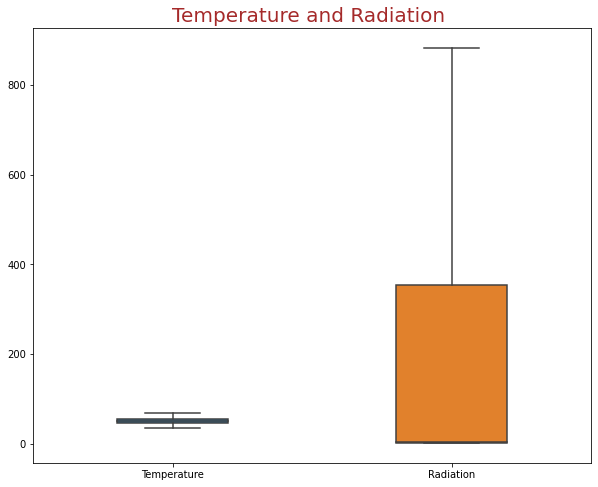

In [ ]:
figure = plt.figure(figsize=(10,8))
sns.boxplot(data=Data[["Temperature","Radiation"]], width=0.4, showfliers=False)
plt.title('Temperature and Radiation ',{'fontsize':20,'color':'brown'})
plt.show()

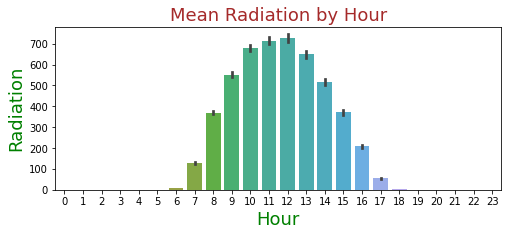

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x="hour", y='Radiation', data=Data)
plt.title('Mean Radiation by Hour',{"fontsize":18,"color":"brown"})
plt.xlabel("Hour",{"fontsize":18,"color":"green"})
plt.ylabel("Radiation",{"fontsize":18,"color":"green"})
plt.show()

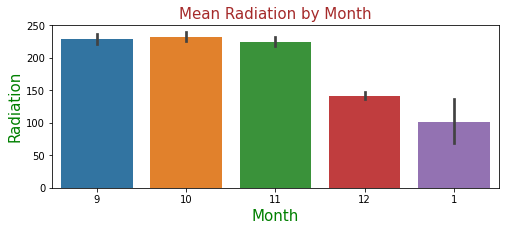

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x="month", y='Radiation', data=Data,order=[9,10,11,12,1])
plt.title('Mean Radiation by Month',{"fontsize":15,"color":"brown"})
plt.xlabel("Month",{"fontsize":15,"color":"green"})
plt.ylabel("Radiation",{"fontsize":15,"color":"green"})
plt.show()

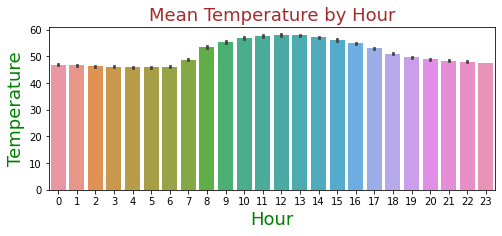

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x="hour", y='Temperature', data=Data)
plt.title('Mean Temperature by Hour',{"fontsize":18,"color":"brown"})
plt.xlabel("Hour",{"fontsize":18,"color":"green"})
plt.ylabel("Temperature",{"fontsize":18,"color":"green"})
plt.show()

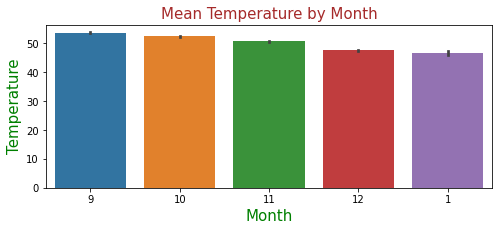

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x="month", y='Temperature', data=Data,order=[9,10,11,12,1])
plt.title('Mean Temperature by Month',{"fontsize":15,"color":"brown"})
plt.xlabel("Month",{"fontsize":15,"color":"green"})
plt.ylabel("Temperature",{"fontsize":15,"color":"green"})
plt.show()

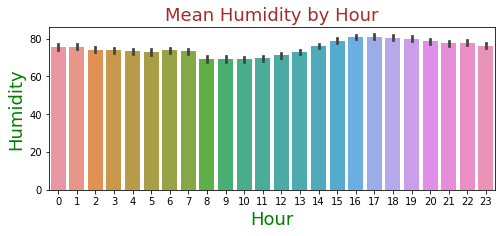

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x="hour", y='Humidity', data=Data)
plt.title('Mean Humidity by Hour',{"fontsize":18,"color":"brown"})
plt.xlabel("Hour",{"fontsize":18,"color":"green"})
plt.ylabel("Humidity",{"fontsize":18,"color":"green"})
plt.show()

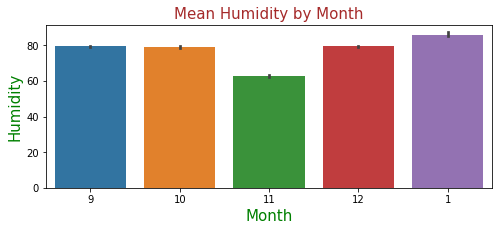

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x="month", y='Humidity', data=Data,order=[9,10,11,12,1])
plt.title('Mean Humidity by Month',{"fontsize":15,"color":"brown"})
plt.xlabel("Month",{"fontsize":15,"color":"green"})
plt.ylabel("Humidity",{"fontsize":15,"color":"green"})
plt.show()

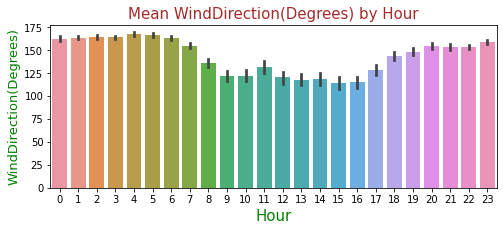

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x="hour", y='WindDirection(Degrees)', data=Data)
plt.title('Mean WindDirection(Degrees) by Hour',{"fontsize":15,"color":"brown"})
plt.xlabel("Hour",{"fontsize":15,"color":"green"})
plt.ylabel("WindDirection(Degrees)",{"fontsize":13,"color":"green"})
plt.show()

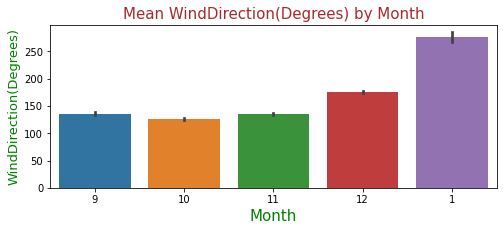

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x="month", y='WindDirection(Degrees)', data=Data,order=[9,10,11,12,1])
plt.title('Mean WindDirection(Degrees) by Month',{"fontsize":15,"color":"brown"})
plt.xlabel("Month",{"fontsize":15,"color":"green"})
plt.ylabel("WindDirection(Degrees)",{"fontsize":13,"color":"green"})
plt.show()

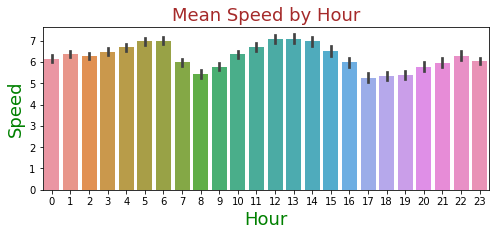

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x="hour", y='Speed', data=Data)
plt.title('Mean Speed by Hour',{"fontsize":18,"color":"brown"})
plt.xlabel("Hour",{"fontsize":18,"color":"green"})
plt.ylabel("Speed",{"fontsize":18,"color":"green"})
plt.show()

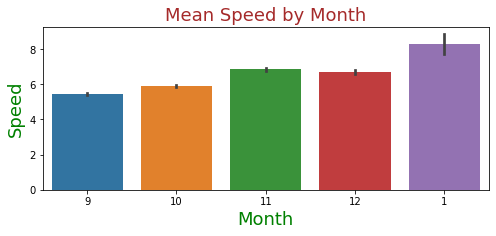

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x="month", y='Speed', data=Data,order=[9,10,11,12,1])
plt.title('Mean Speed by Month',{"fontsize":18,"color":"brown"})
plt.xlabel("Month",{"fontsize":18,"color":"green"})
plt.ylabel("Speed",{"fontsize":18,"color":"green"})
plt.show()

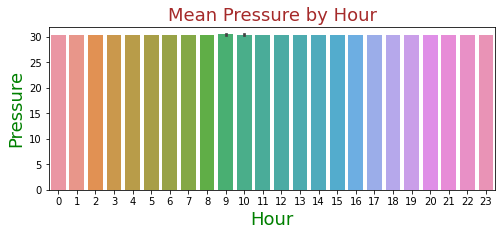

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x="hour", y='Pressure', data=Data)
plt.title('Mean Pressure by Hour',{"fontsize":18,"color":"brown"})
plt.xlabel("Hour",{"fontsize":18,"color":"green"})
plt.ylabel("Pressure",{"fontsize":18,"color":"green"})
plt.show()

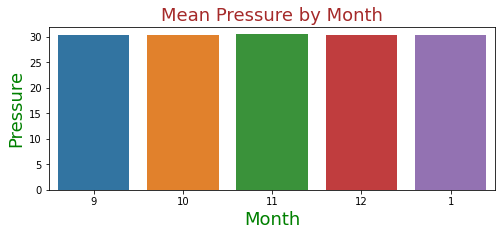

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(x="month", y='Pressure', data=Data,order=[9,10,11,12,1])
plt.title('Mean Pressure by Month',{"fontsize":18,"color":"brown"})
plt.xlabel("Month",{"fontsize":18,"color":"green"})
plt.ylabel("Pressure",{"fontsize":18,"color":"green"})
plt.show()

In [ ]:
Data.drop([ 'Data', 'Time', 'TimeSunRise', 'TimeSunSet','Time_conv',], axis=1,inplace=True)

**MACHINE LEARNING**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = Data.drop(['Radiation'],axis=1)
y =  Data.Radiation

In [ ]:
x.head()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,hour,month,year,total_time
0,1475229326,48,30.46,59,177.39,5.62,23,9,2016,12
1,1475229023,48,30.46,58,176.78,3.37,23,9,2016,12
2,1475228726,48,30.46,57,158.75,3.37,23,9,2016,12
3,1475228421,48,30.46,60,137.71,3.37,23,9,2016,12
4,1475228124,48,30.46,62,104.95,5.62,23,9,2016,12


In [ ]:
y.head()

0    1.21
1    1.21
2    1.23
3    1.21
4    1.17
Name: Radiation, dtype: float64

In [ ]:
y.value_counts()

1.22       2264
1.23       2110
1.21       2010
1.24       1725
1.20       1558
           ... 
601.96        1
658.63        1
108.51        1
1040.07       1
322.68        1
Name: Radiation, Length: 14434, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([ 4.44938260e-05,  4.43807040e+01, -4.68223297e+02,  5.51050179e-01,
       -2.27496792e-01,  5.15896052e+00, -7.42949619e+00, -7.90885197e+01,
       -9.05646989e+02, -4.79683615e+01])

In [ ]:
pred = lr.predict(x_test)
pred

array([494.01406984, 471.47441028,   3.87974171, ...,  85.59930856,
        15.34238527, 803.06474097])

In [ ]:
y_test

22107     675.86
3780     1286.85
13651       1.23
30473       4.43
9084        1.22
          ...   
8137      608.89
31099       1.25
12774      12.27
16777       1.22
22954     892.65
Name: Radiation, Length: 8172, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.6230903909345582

In [ ]:
x = Data.drop(['Radiation'],axis=1)
y = Data['Radiation']

In [ ]:
numeric_data = ['Temperature','Pressure','Humidity']

In [ ]:
# Normalisation 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(x[numeric_data])
x[numeric_data]=scaler.transform(x[numeric_data])

In [ ]:
#splitting into training and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 8) 

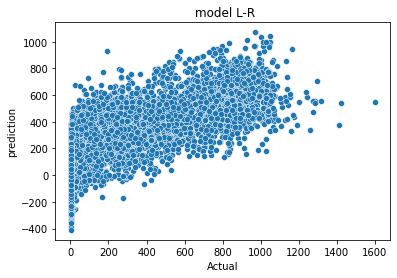

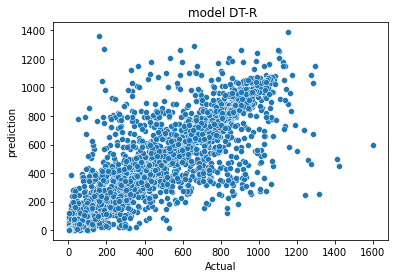

In [ ]:
#comparing which model is best decision tree or linear regression.

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score

models=[('L-R',LinearRegression()),('DT-R',DecisionTreeRegressor())]
scores=[]

for name,model in models:
  model.fit(x_train,y_train) # fitting training data with each model

  preds=model.predict(x_test) #predicting test data with each model
  
  score=explained_variance_score(preds,y_test)
  r2score=r2_score(y_test,preds)
  sns.scatterplot(x=y_test,y=preds).set(title=f' model {name}')  # plotting the scatter plot for actual value and prediction in each model
  plt.xlabel("Actual")
  plt.ylabel("prediction")
  plt.show()
  scores.append([name,score,r2score]) 

Here, we can see that, the scatter plot using DecisionTreeRegressor have more closeness between the actual and predicted values.

In [ ]:
# converting the scores list to dataset 

df=pd.DataFrame(scores,columns=['Name','Score','r2score'])
df.sort_values('Score',ascending = False)

,Name,Score,r2score
1,DT-R,0.882258,0.88323
0,L-R,0.395928,0.62280


Here also we can see that Decision Tree Regressor is having higher r2 score and the explained_variance_score. So we are choosing Decision Tree.

Prediction Using DecisionTree Regressor

In [ ]:
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
pred

array([218.88,   1.27,  10.5 , ...,   1.17,   1.2 ,   1.27])

In [ ]:
len(pred)

8172

# Clustering...

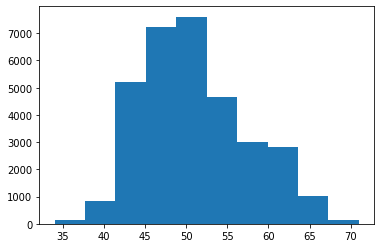

In [ ]:
plt.hist(Data['Temperature'])
plt.show()

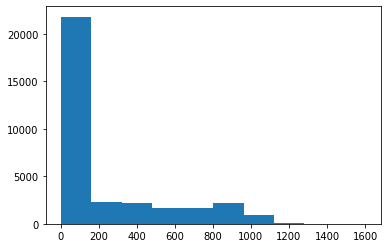

In [ ]:
plt.hist(Data['Radiation'])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km_model = KMeans()
km_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
New_Data = Data.loc[ : ,['Temperature','Radiation'] ]

In [ ]:
km_model.fit(New_Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
New_Data['Cluster'] = km_model.fit_predict(New_Data)

In [ ]:
New_Data

,Temperature,Radiation,Cluster
0,48,1.21,2
1,48,1.21,2
2,48,1.23,2
3,48,1.21,2
4,48,1.17,2
...,...,...,...
32681,44,1.22,2
32682,44,1.17,2
32683,44,1.20,2
32684,44,1.23,2


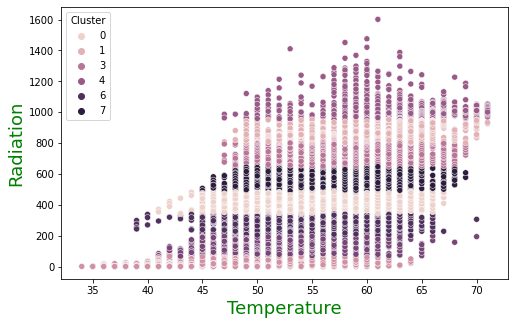

In [ ]:
figure = plt.figure(figsize=(8,5))
sns.scatterplot(x='Temperature',y='Radiation',data=New_Data,hue='Cluster')
plt.xlabel("Temperature",{"fontsize":18,"color":"green"})
plt.ylabel("Radiation",{"fontsize":18,"color":"green"})
plt.show()

In [ ]:
km_model.inertia_

29613154.404218826

In [ ]:
from sklearn.cluster import KMeans
ssw = []

for i in range(2,8):
  km_model = KMeans(n_clusters=i)
  km_model.fit_predict(New_Data.drop('Cluster',axis=1))
  ssw.append(km_model.inertia_)

In [ ]:
ssw

[539432436.7711129,
 197288686.736366,
 113905378.63531473,
 74049547.62715134,
 51650403.02668586,
 38043928.3008022]

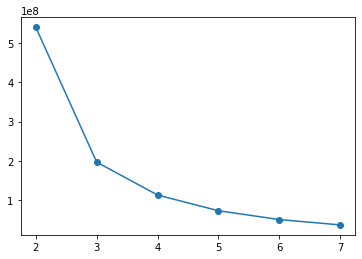

In [ ]:
plt.plot( list(range(2,8)), ssw,marker='o')
plt.show()

In [ ]:
New_Data.drop('Cluster',axis=1,inplace=True)

In [ ]:
from sklearn.cluster import KMeans
#ssw = []

for i in range(3,6):
  km_model = KMeans(n_clusters=i)
  New_Data['Cluster_'+str(i)] = km_model.fit_predict(New_Data)
  #ssw.append(km_model.inertia_)

In [ ]:
New_Data.head()

,Temperature,Radiation,Cluster_3,Cluster_4,Cluster_5
0,48,1.21,1,0,0
1,48,1.21,1,0,0
2,48,1.23,1,0,0
3,48,1.21,1,0,0
4,48,1.17,1,0,0


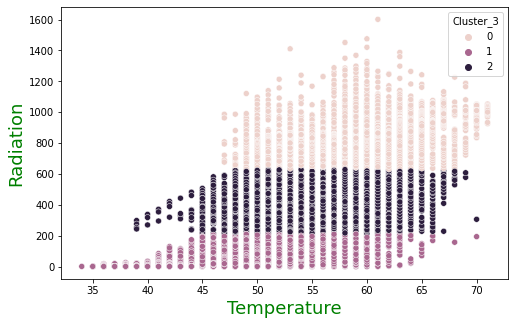

In [ ]:
figure = plt.figure(figsize=(8,5))
sns.scatterplot(x='Temperature',y='Radiation',data=New_Data,hue='Cluster_3')
plt.xlabel("Temperature",{"fontsize":18,"color":"green"})
plt.ylabel("Radiation",{"fontsize":18,"color":"green"})
plt.show()

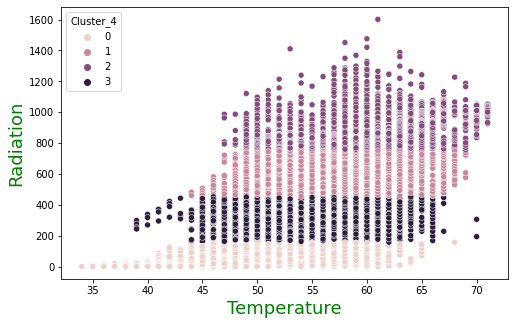

In [ ]:
figure = plt.figure(figsize=(8,5))
sns.scatterplot(x='Temperature',y='Radiation',data=New_Data,hue='Cluster_4')
plt.xlabel("Temperature",{"fontsize":18,"color":"green"})
plt.ylabel("Radiation",{"fontsize":18,"color":"green"})
plt.show()

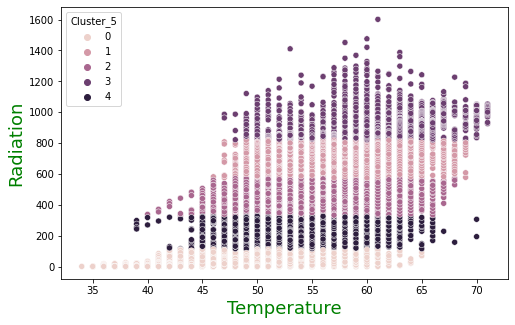

In [ ]:
figure = plt.figure(figsize=(8,5))
sns.scatterplot(x='Temperature',y='Radiation',data=New_Data,hue='Cluster_5')
plt.xlabel("Temperature",{"fontsize":18,"color":"green"})
plt.ylabel("Radiation",{"fontsize":18,"color":"green"})
plt.show()